In [1]:
!pip install ultralytics

In [7]:
!pip install --upgrade ultralytics ray


   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.2 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.2 MB 3.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.8/25.2 MB 3.9 MB/s eta 0:00:07
   --- ------------------------------------ 2.4/25.2 MB 3.8 MB/s eta 0:00:06
   ---- ----------------------------------- 2.6/25.2 MB 2.9 MB/s eta 0:00:08
   ---- ----------------------------------- 2.9/25.2 MB 3.0 MB/s eta 0:00:08
   ------ --------------------------------- 3.9/25.2 MB 2.9 MB/s eta 0:00:08
   ------- -------------------------------- 4.5/25.2 MB 2.9 MB/s eta 0:00:08
   ------- -------------------------------- 4.7/25.2 MB 2.8 MB/s eta 0:00:08
   -------- ------------------------------- 5.2/25.2 MB 2.8 MB/s eta 0:00:08
   --------- ------------------------------ 5.8/25.2 MB 2.7 MB/s eta 0:00:08
   --------- ------------------------------ 6.0/25.2 MB 2.7 MB/s eta 0:00:08
   ----------

In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

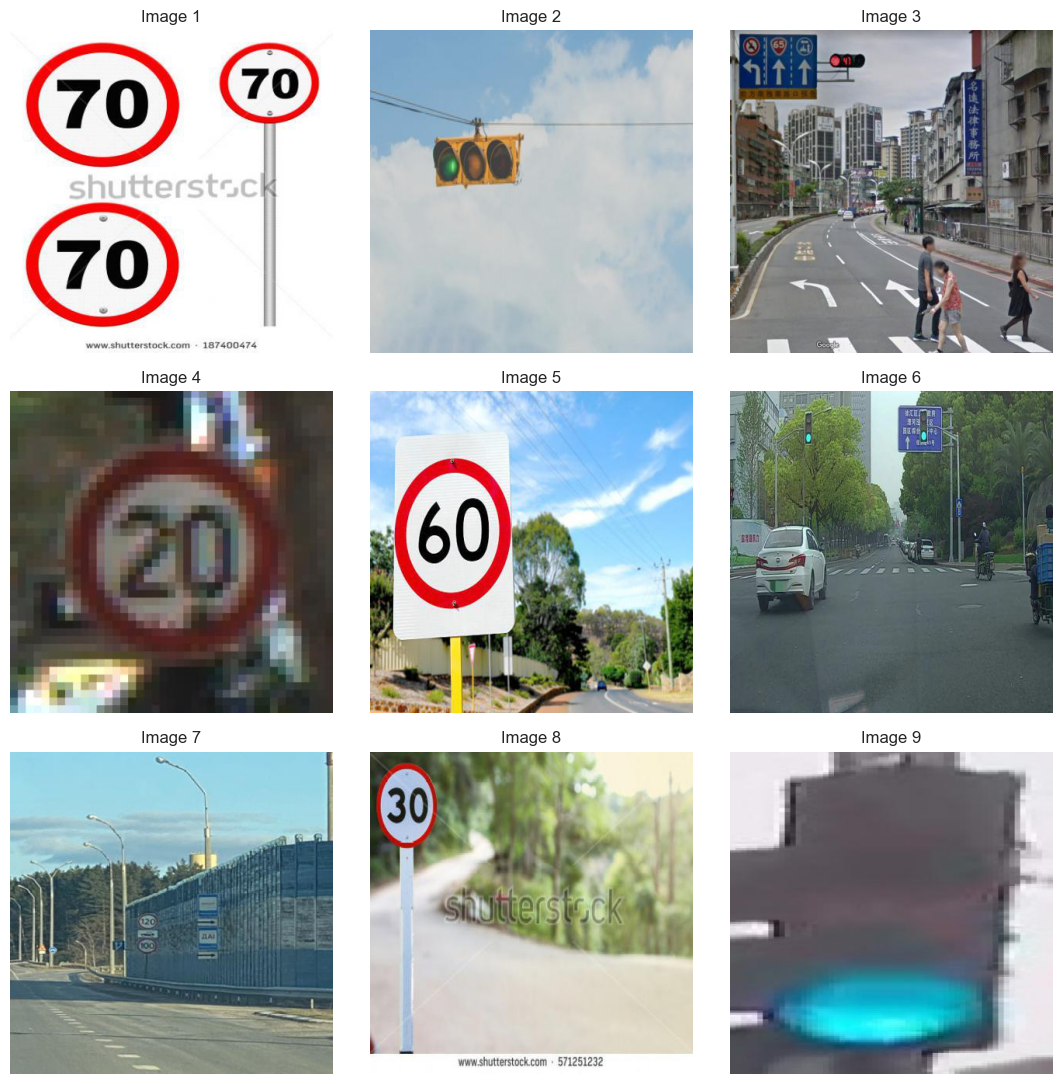

In [3]:
# Set environment variable to bypass OpenMP conflict
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Parameters
Image_dir = 'D:/Yolo_test1/car/train/images'
num_samples = 9

# Get image files
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

# Plot images
fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [4]:
# Get the size of the image
image = cv2.imread("D:/Yolo_test1/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="D:/Yolo_test1/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

100%|██████████| 6.25M/6.25M [00:02<00:00, 3.03MB/s]


Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Yolo_test1/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

2024-12-15 13:30:14,983	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-15 13:30:15,371	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.51MB/s]


AMP: checks passed 


train: Scanning D:\Yolo_test1\car\train\labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:07<00:00, 468.67it/s]


train: New cache created: D:\Yolo_test1\car\train\labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2060) 6.00G total, 0.10G reserved, 0.06G allocated, 5.84G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.191         80.95         213.9        (1, 3, 640, 640)                    list
     3013773       16.42         0.296         81.93         51.04        (2, 3, 640, 640)                    list
     3013773       32.84         0.537          35.3         48.08        (4, 3, 640, 640)                    list
     3013773       65.67         0.977         34.39         53.92        (8, 3, 640, 640)                    list
     3013773       131.3         1.890         56.93         78.04       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 30 for CUDA:0 3.64G/6.00G (61%

train: Scanning D:\Yolo_test1\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning D:\Yolo_test1\car\valid\labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:02<00:00, 279.96it/s]


val: New cache created: D:\Yolo_test1\car\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.82G     0.8509      3.549      1.191         60        640: 100%|██████████| 118/118 [00:42<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]

                   all        801        944      0.295      0.496      0.239      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.79G     0.7448      2.477      1.083         41        640: 100%|██████████| 118/118 [00:48<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.43it/s]


                   all        801        944      0.424      0.534      0.429       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.77G     0.7256      2.091      1.067         39        640: 100%|██████████| 118/118 [00:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.42it/s]


                   all        801        944      0.618      0.601      0.656      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.79G     0.7198      1.732      1.062         46        640: 100%|██████████| 118/118 [00:45<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        801        944      0.706      0.607      0.685      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.77G     0.6959      1.485      1.043         56        640: 100%|██████████| 118/118 [00:42<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]


                   all        801        944      0.732      0.706       0.77      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.77G     0.6682      1.297      1.035         40        640: 100%|██████████| 118/118 [00:36<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        801        944      0.838      0.707      0.808      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.77G     0.6572      1.168      1.026         32        640: 100%|██████████| 118/118 [00:41<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        801        944      0.804      0.769      0.839      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.77G     0.6487      1.104      1.023         44        640: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        801        944      0.885      0.783      0.856      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.77G     0.6354      1.053       1.01         48        640: 100%|██████████| 118/118 [00:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        801        944      0.903      0.812      0.906      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.81G      0.624     0.9466      1.008         38        640: 100%|██████████| 118/118 [00:42<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all        801        944       0.91      0.806      0.894       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.77G     0.6288     0.9281      1.005         49        640: 100%|██████████| 118/118 [00:47<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]

                   all        801        944      0.896      0.823      0.894      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.79G     0.6111     0.8825     0.9973         52        640: 100%|██████████| 118/118 [00:47<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all        801        944      0.898      0.831      0.911       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.81G     0.6014     0.8287     0.9953         66        640: 100%|██████████| 118/118 [00:48<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        801        944      0.931      0.861      0.928      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.77G     0.5952     0.8061     0.9873         45        640: 100%|██████████| 118/118 [00:45<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.16it/s]


                   all        801        944      0.943      0.832      0.922      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.77G     0.5907     0.7908     0.9851         50        640: 100%|██████████| 118/118 [00:43<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.46it/s]

                   all        801        944      0.919      0.856      0.923      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.79G     0.5841     0.7843     0.9834         40        640: 100%|██████████| 118/118 [00:41<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        801        944      0.939      0.847      0.928      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.77G     0.5674     0.7337     0.9762         44        640: 100%|██████████| 118/118 [00:45<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        801        944       0.95      0.847      0.935      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.77G     0.5634     0.7212      0.973         49        640: 100%|██████████| 118/118 [00:43<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.34it/s]

                   all        801        944      0.957      0.882      0.944      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.77G     0.5638     0.7106     0.9756         45        640: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        801        944      0.963       0.86      0.942      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.77G     0.5558     0.6636     0.9667         33        640: 100%|██████████| 118/118 [00:37<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        801        944      0.942      0.881      0.948      0.807


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.76G     0.5637     0.4932     0.9462         28        640: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        801        944      0.933      0.887      0.947      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.76G     0.5485     0.4713     0.9324         30        640: 100%|██████████| 118/118 [00:38<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        801        944      0.933       0.89      0.948      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.77G     0.5432     0.4533     0.9298         21        640: 100%|██████████| 118/118 [00:37<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        801        944      0.947      0.882      0.948      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.76G      0.532     0.4397      0.926         24        640: 100%|██████████| 118/118 [00:36<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        801        944      0.948      0.896      0.952      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.81G     0.5321     0.4133     0.9268         23        640: 100%|██████████| 118/118 [00:37<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]

                   all        801        944      0.951      0.905      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.77G      0.514     0.3981      0.919         23        640: 100%|██████████| 118/118 [00:38<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        801        944      0.942      0.892      0.955      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.76G     0.5146     0.3902     0.9147         24        640: 100%|██████████| 118/118 [00:38<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        801        944      0.934      0.911      0.955      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.76G     0.5036     0.3722     0.9077         26        640: 100%|██████████| 118/118 [00:37<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        801        944      0.946      0.904      0.954      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.76G     0.5021      0.368      0.903         28        640: 100%|██████████| 118/118 [00:37<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        801        944      0.948       0.91      0.958       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.76G     0.4932     0.3625     0.9002         28        640: 100%|██████████| 118/118 [00:37<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]


                   all        801        944      0.948      0.904      0.958      0.828

30 epochs completed in 0.474 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.3MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:14<00:00,  1.03s/it]


                   all        801        944      0.948       0.91      0.958      0.829
           Green Light         87        122      0.865      0.736      0.834      0.497
             Red Light         74        108      0.897      0.726       0.82      0.504
       Speed Limit 100         52         52       0.99      0.981      0.994      0.894
       Speed Limit 110         17         17      0.949      0.941      0.971       0.89
       Speed Limit 120         60         60          1      0.956      0.992      0.928
        Speed Limit 20         56         56       0.97      0.982      0.986      0.857
        Speed Limit 30         71         74       0.92      0.959      0.988      0.923
        Speed Limit 40         53         55      0.873      0.964      0.986      0.882
        Speed Limit 50         68         71      0.984      0.873      0.963      0.869
        Speed Limit 60         76         76      0.946      0.929      0.961      0.873
        Speed Limit 7

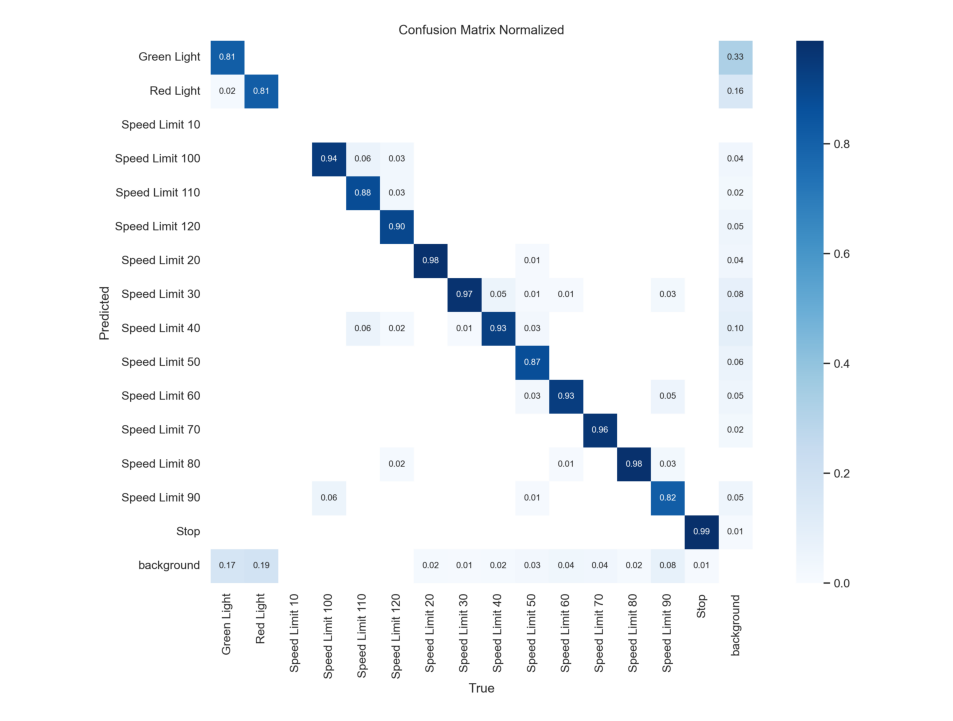

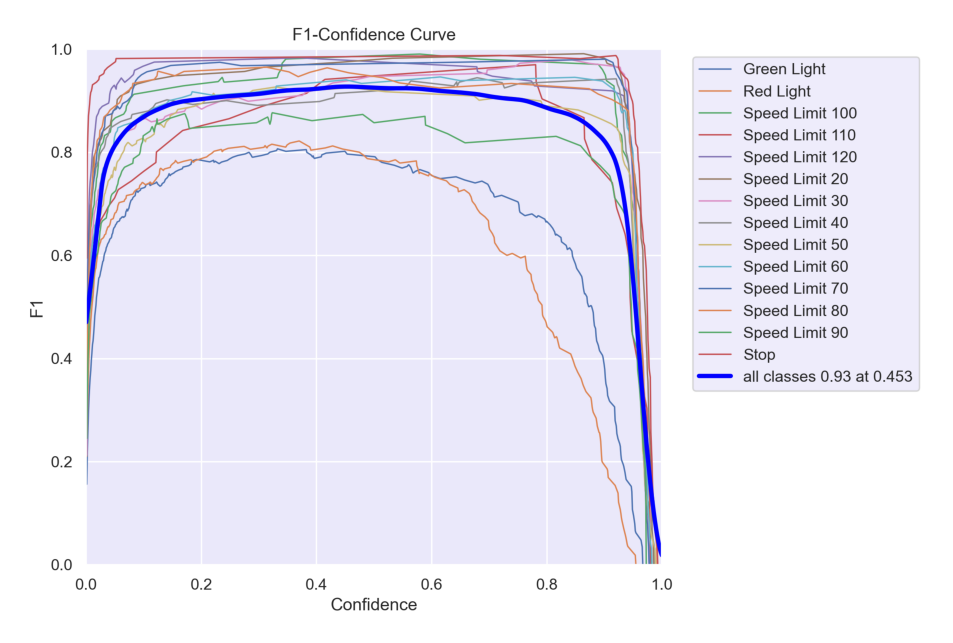

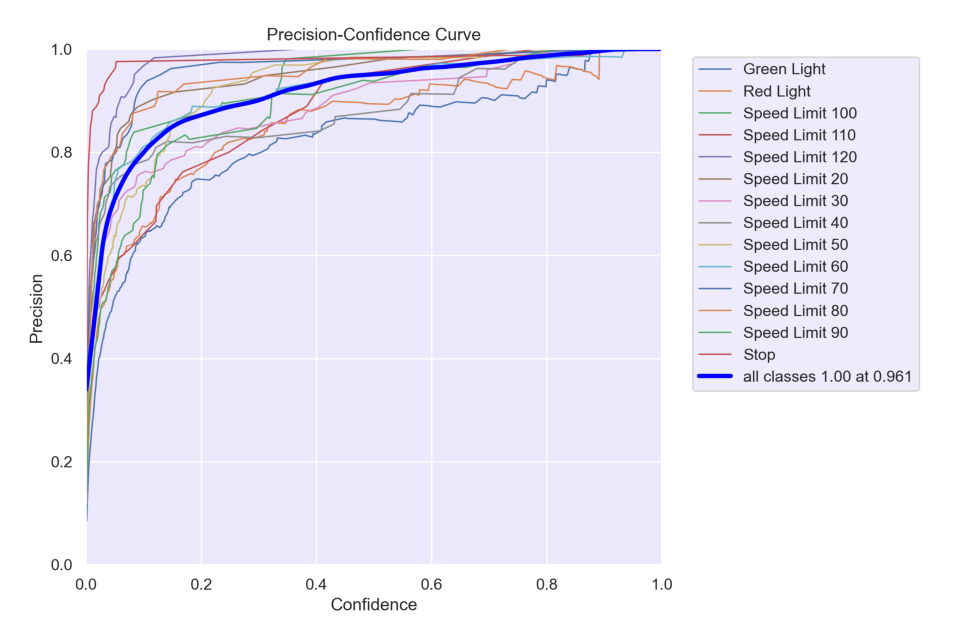

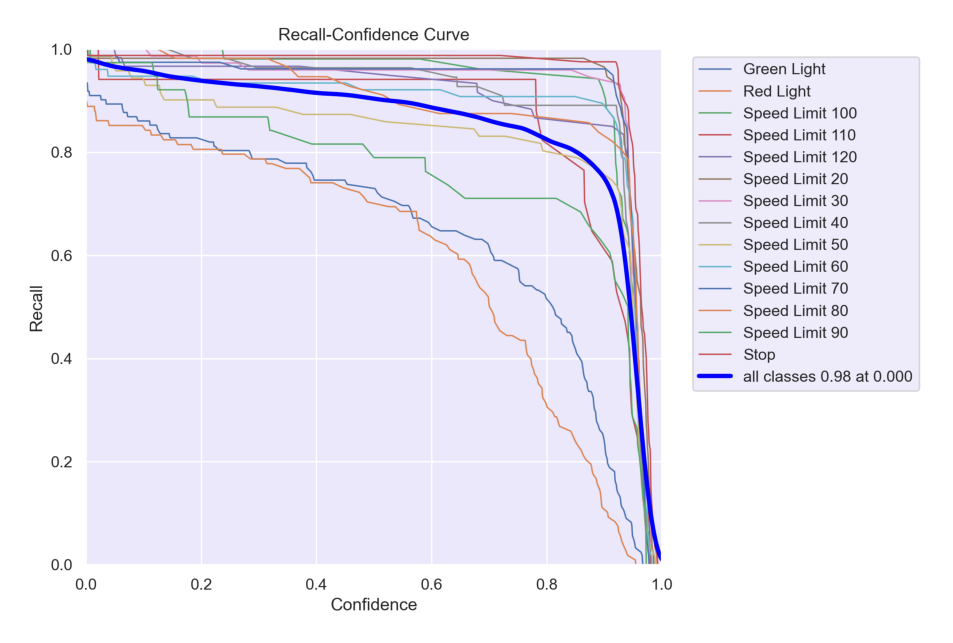

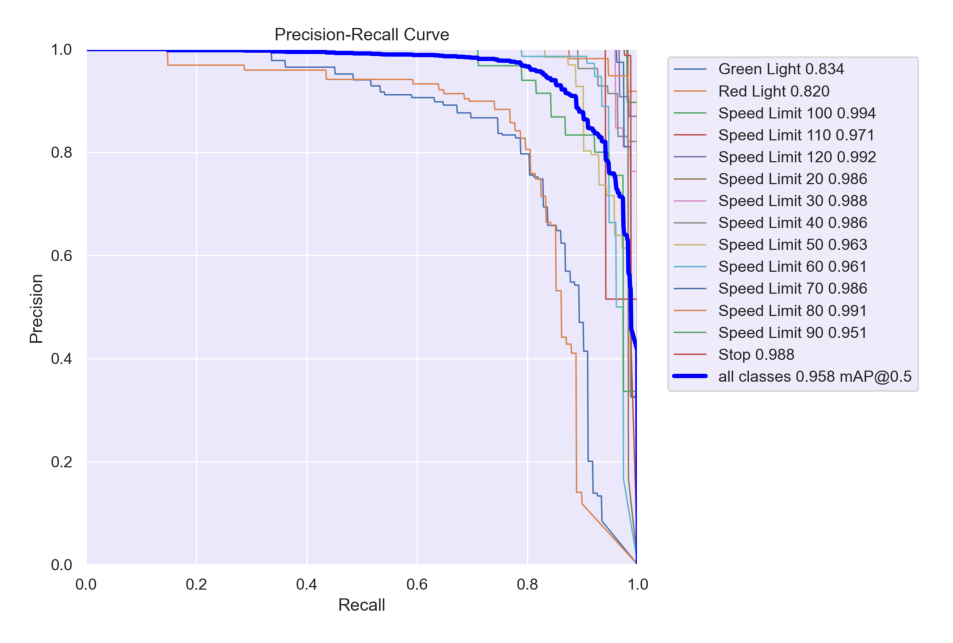

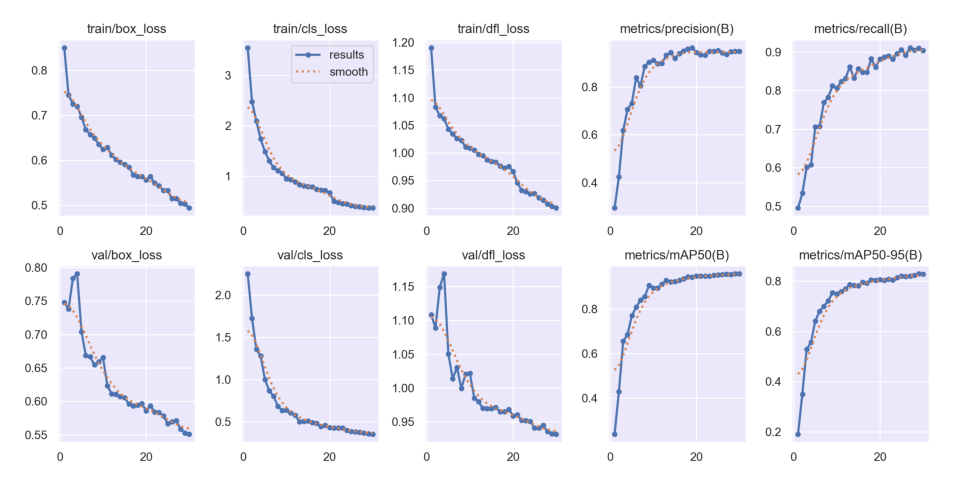

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'D:/Yolo_test1/runs/detect/train2'

# Display the images
display_images(post_training_files_path, image_files)

In [9]:
Result_Final_model = pd.read_csv('D:/Yolo_test1/runs/detect/train2/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1263.63         0.56365         0.49320         0.94621   
21     22  1315.41         0.54852         0.47134         0.93241   
22     23  1364.34         0.54323         0.45327         0.92978   
23     24  1411.11         0.53203         0.43972         0.92598   
24     25  1459.52         0.53215         0.41334         0.92676   
25     26  1508.95         0.51399         0.39810         0.91899   
26     27  1557.48         0.51457         0.39017         0.91466   
27     28  1606.89         0.50356         0.37223         0.90770   
28     29  1656.17         0.50212         0.36802         0.90301   
29     30  1704.33         0.49321         0.36253         0.90025   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93272            0.88662           0.94678   
21               0.93252            0.88972           0.94802   
22               0.94747            0.88156           0.94820   
23               0.94845            0.89570           0.95153   
24               0.95096            0.90527           0.95332   
25               0.94202            0.89158           0.95468   
26               0.93446            0.91110           0.95548   
27               0.94613            0.90446           0.95444   
28               0.94802            0.91005           0.95789   
29               0.94788            0.90386           0.95783   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80319       0.59330       0.42722       0.96022  0.000179   
21              0.80796       0.58414       0.42693       0.95236  0.000161   
22              0.80579       0.58305       0.42929       0.95195  0.000144   
23              0.81427       0.57822       0.39969       0.95078  0.000127   
24              0.82073       0.56655       0.38608       0.94086  0.000109   
25              0.81916       0.56927       0.38349       0.94095  0.000092   
26              0.82106       0.57105       0.37922       0.94468  0.000075   
27              0.82324       0.55837       0.36719       0.93550  0.000057   
28              0.82989       0.55281       0.35722       0.93235  0.000040   
29              0.82817       0.55092       0.35517       0.93182  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

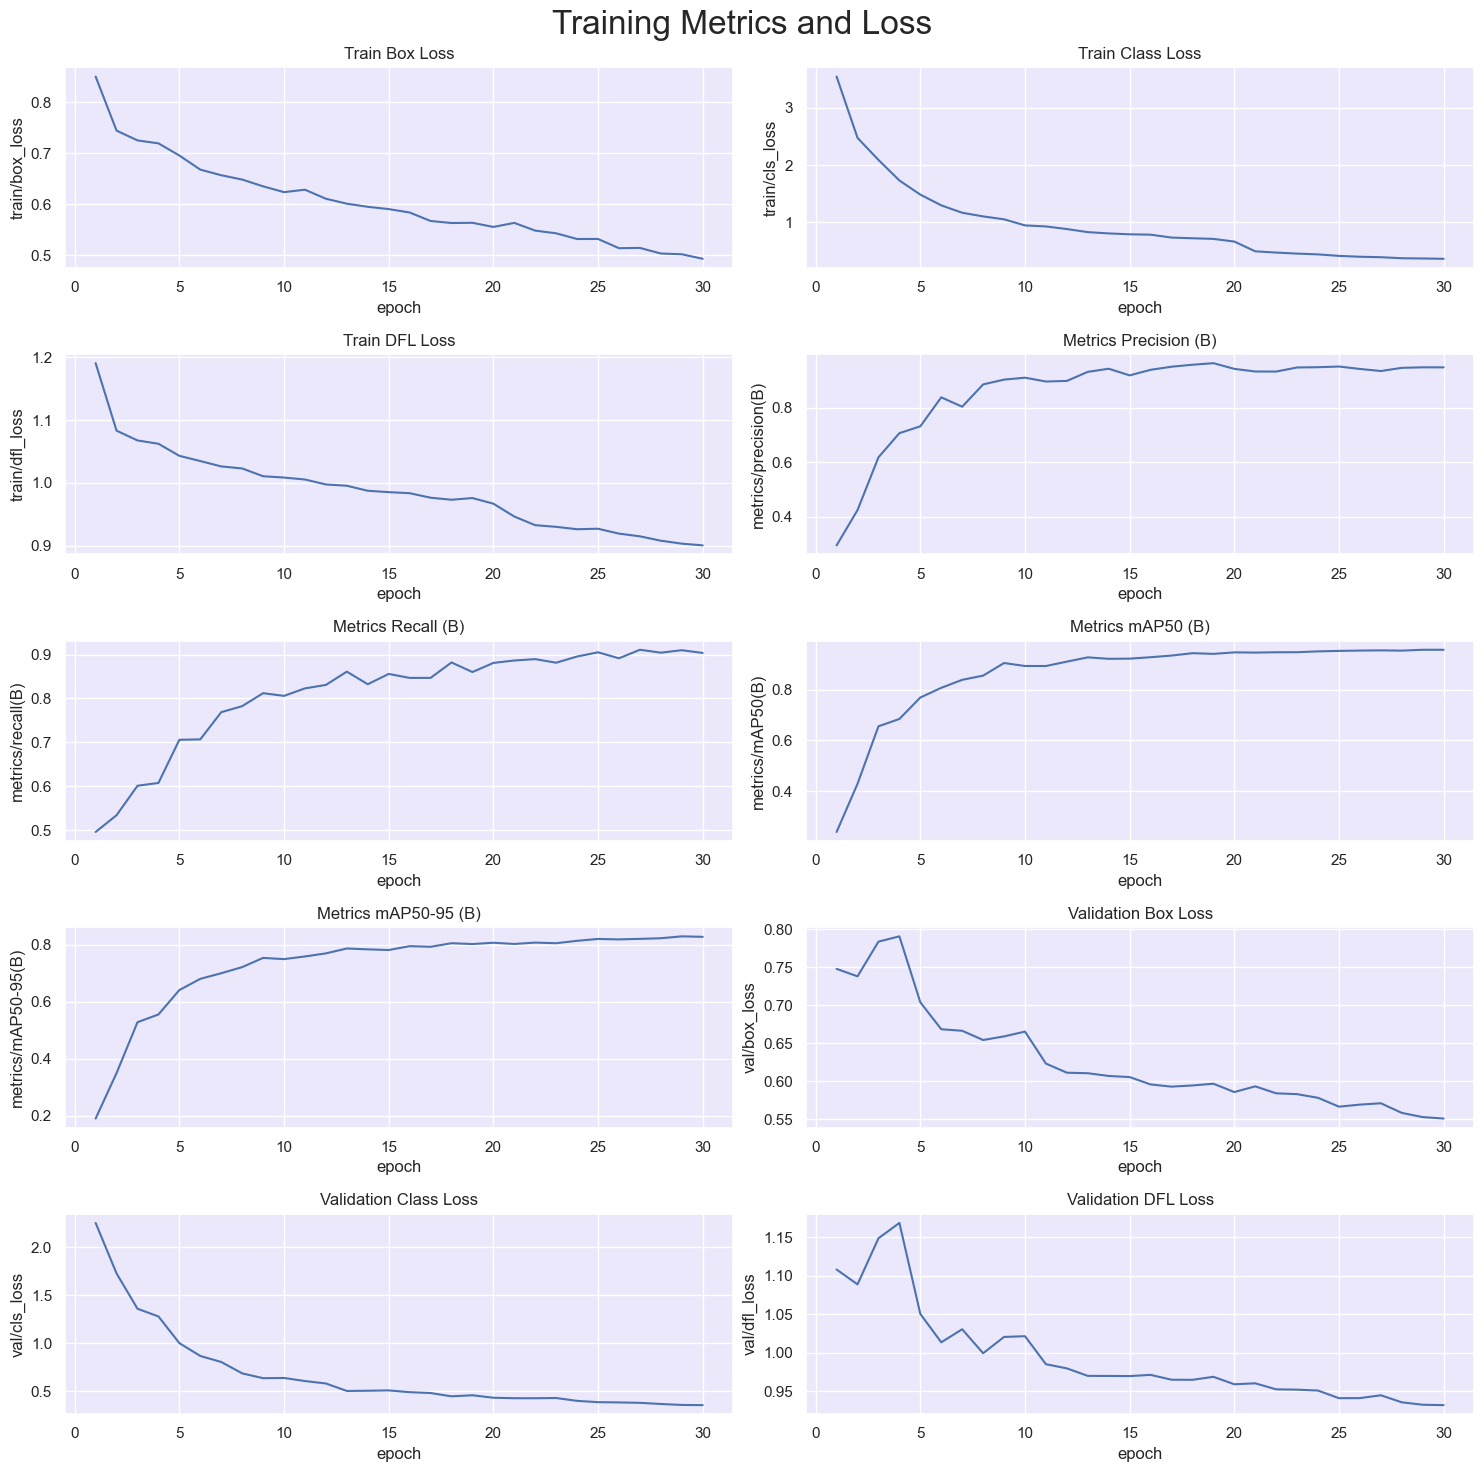

In [10]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [11]:
# Loading the best performing model
Valid_model = YOLO('D:/Yolo_test1/runs/detect/train2/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Yolo_test1\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.15it/s]


                   all        801        944      0.949      0.911      0.959      0.831
           Green Light         87        122      0.865      0.737      0.847        0.5
             Red Light         74        108      0.909      0.736      0.832      0.501
       Speed Limit 100         52         52       0.99      0.981      0.994      0.895
       Speed Limit 110         17         17      0.949      0.941      0.971      0.908
       Speed Limit 120         60         60          1      0.956      0.992      0.929
        Speed Limit 20         56         56       0.97      0.982      0.986      0.857
        Speed Limit 30         71         74       0.92      0.959      0.988       0.92
        Speed Limit 40         53         55      0.872      0.964      0.986      0.881
        Speed Limit 50         68         71      0.984      0.873      0.963      0.868
        Speed Limit 60         76         76      0.946       0.93      0.961      0.877
        Speed Limit 7


0: 640x640 1 Speed Limit 30, 79.0ms
Speed: 10.3ms preprocess, 79.0ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 11.3ms
Speed: 2.9ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 11.3ms
Speed: 3.9ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 11.3ms
Speed: 3.0ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 9.8ms
Speed: 3.9ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 1 Red Light, 10.3ms
Speed: 2.9ms preprocess, 10.3ms

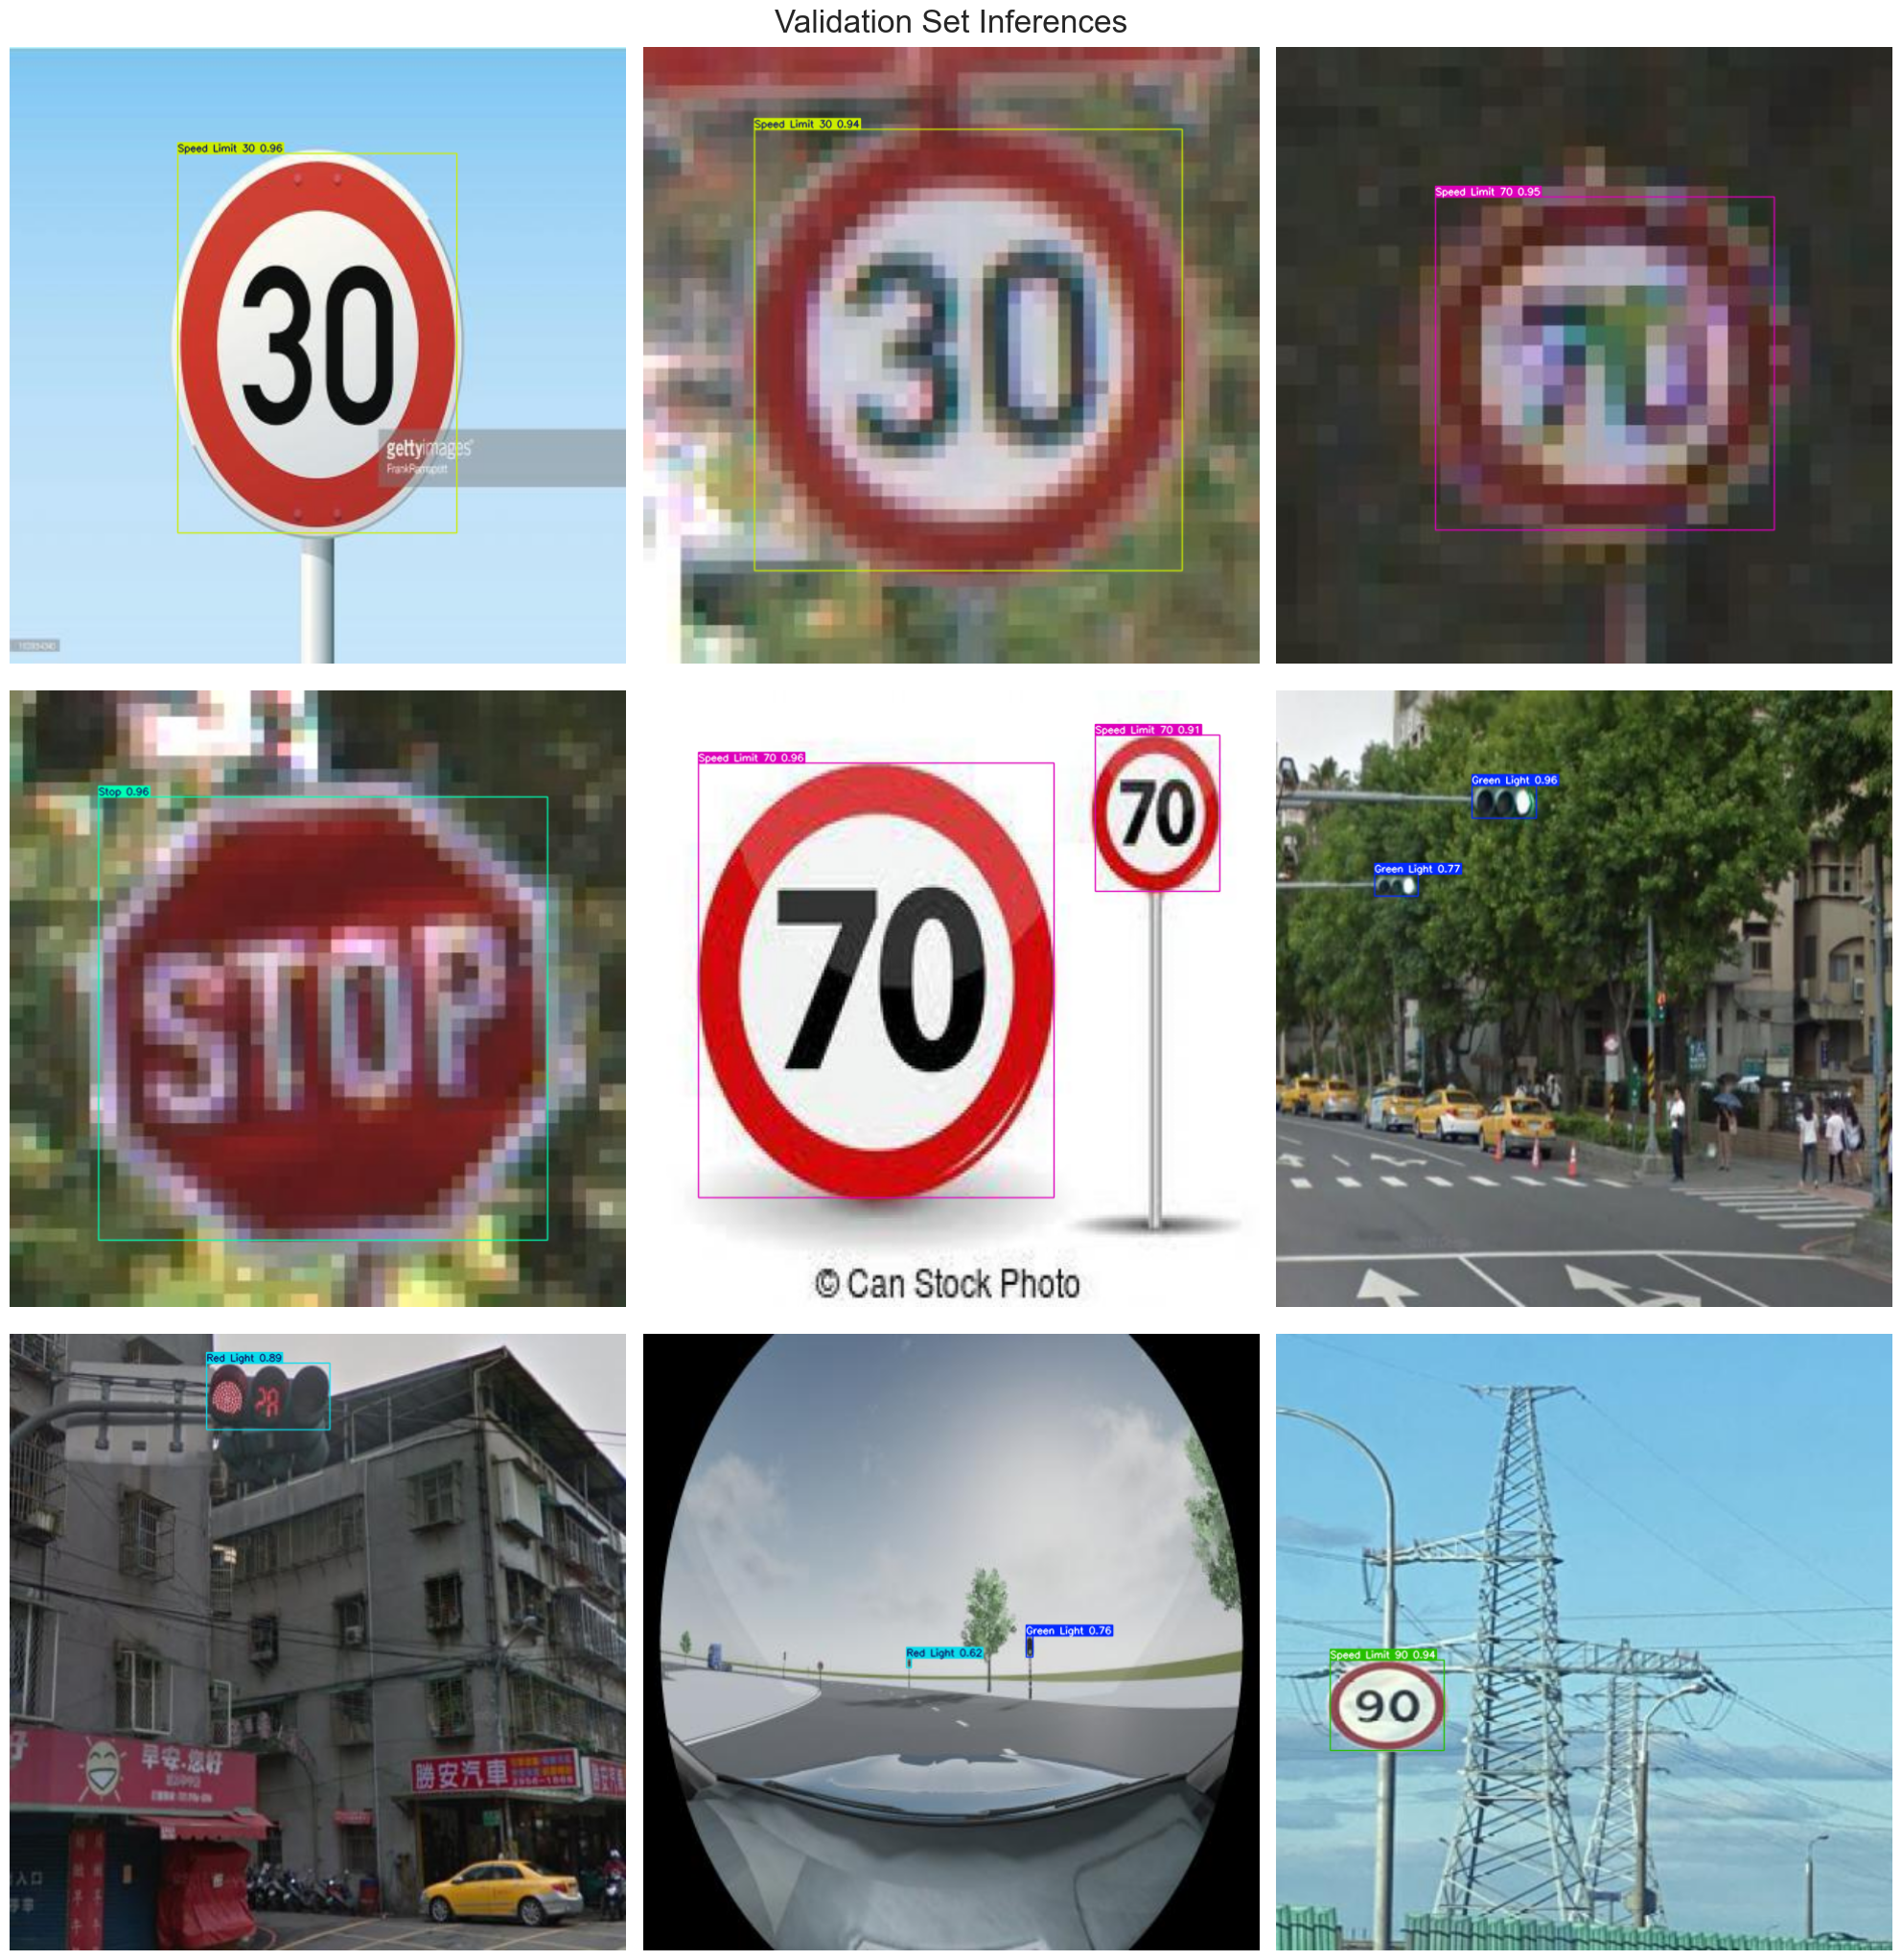

In [12]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'D:/Yolo_test1/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
Valid_model.export(format='onnx')

Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu118 CPU (Intel Core(TM) i7-9750H 2.60GHz)

PyTorch: starting from 'D:\Yolo_test1\runs\detect\train2\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ---------------------------------------- 14.5/14.5 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 279.7/279.7 MB 3.4 MB/s eta 0:00:00

requirements: AutoUpdate success  109.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success  114.9s, saved as 'D:\Yolo_test1\runs\detect\train2\weights\best.onnx' (11.7 MB)

Export complete (117.1s)
Results saved to D:\Yolo_test1\runs\detect\train2\weights
Predic

'D:\\Yolo_test1\\runs\\detect\\train2\\weights\\best.onnx'

In [14]:
# Access the laptop camera (camera index 0)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot access the camera")
    exit()

# Loop to capture and process each frame
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Cannot read frame")
        break

    # Run YOLO inference on the frame
    results = Valid_model.predict(source=frame, save=False, imgsz=640, conf=0.5)

    # Annotate the frame with bounding boxes and labels
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('Traffic Sign Recognition', annotated_frame)

    # Exit loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 115.5ms
Speed: 9.8ms preprocess, 115.5ms inference, 11.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.3ms
Speed: 1.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.8ms
Speed: 2.0ms preprocess, 10.8m